# Inferential Statistics Ib - Frequentism

## Learning objectives

Welcome to the second Frequentist inference mini-project! Over the course of working on this mini-project and the previous frequentist mini-project, you'll learn the fundamental concepts associated with frequentist inference. The following list includes the topics you will become familiar with as you work through these two mini-projects:
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate confidence intervals and p-values
* how those confidence intervals and p-values allow you to perform hypothesis (or A/B) tests

## Prerequisites

* what a random variable is
* what a probability density function (pdf) is
* what the cumulative density function is
* a high-level sense of what the Normal distribution

If these concepts are new to you, please take a few moments to Google these topics in order to get a sense of what they are and how you might use them.

These two notebooks were designed to bridge the gap between having a basic understanding of probability and random variables and being able to apply these concepts in Python. This second frequentist inference mini-project focuses on a real-world application of this type of inference to give you further practice using these concepts. 

In the previous notebook, we used only data from a known normal distribution. You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.

## Hospital medical charges

Imagine that a hospital has hired you as their data analyst. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. This mini-project, as well as the bootstrap and Bayesian inference mini-projects also found in this unit are designed to illustrate how each of the inferential statistics methods have their uses for different use cases. In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?
Answering that last question with a frequentist approach makes some assumptions, or requires some knowledge, about the two groups. In the next mini-project, you'll use bootstrapping to test that assumption. And in the final mini-project of the unit, you're going to create a model for simulating _individual_ charges (not a sampling distribution) that the hospital can use to model a range of scenarios.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). For the purposes of this exercise, assume the observations are the result of random sampling from our one hospital. Recall in the previous assignment, we introduced the Central Limit Theorem (CLT), and how it tells us that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data. Remember, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
import seaborn as sns
import scipy.stats as stats
medical = pd.read_csv('data/insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

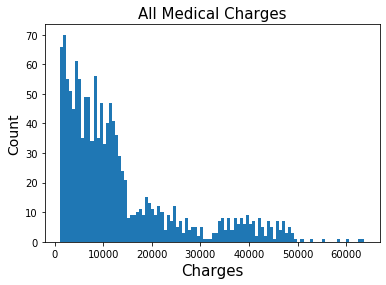

In [4]:
plt.hist(medical.charges, bins=100);
plt.xlabel('Charges', fontsize=15);
plt.ylabel('Count', fontsize=14);
plt.title('All Medical Charges', fontsize=15);

From rough visual inspection, the distribution appears multimodal.

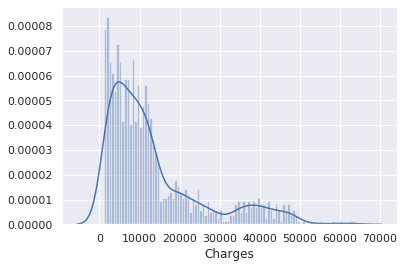

In [5]:
# plot a gaussian kernel density estimate over the histogram
sns.set()
sns.distplot(medical.charges, bins=100, axlabel='Charges');

Looking at the seaborn plot, it appears that we have large regions of outliers and not a true multimodal plot.

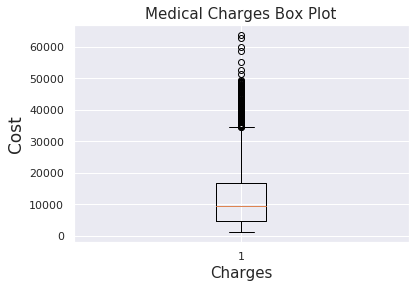

In [6]:
# get a better perspective on the outliers
plt.boxplot(medical.charges);
plt.xlabel('Charges', fontsize=15);
plt.ylabel('Cost', fontsize=17);
plt.title('Medical Charges Box Plot', fontsize=15);

The high cost outliers are clearly visible in the box plot.

In [7]:
charges_mean = np.mean(medical.charges)
charges_mean

13270.422265141257

In [8]:
charges_std = np.std(medical.charges, ddof=1)
charges_std

12110.011236694001

__A:__ The standard deviation is close to the mean.<br>
This is due to outliers on the right, which can be seen in the plots.<br>
If these statistics are used, it may be difficult to make inferences.<br>
The median should be observed to see if there is much difference.

In [9]:
charges_median = np.median(medical.charges)
charges_median

9382.033

The median is very large, as well.

__Q:__ The administrator is concerned that the actual average charge has fallen below 12000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ 
Use an inferential statistical test to find the chances that the null hypothesis (any observed correlation between the average of the sample and the population average is not reliable, but due to chance) is true. If the chances are low, then the rejection of the null hypothesis leaves the alternate hypothesis (the correlation between the average of the sample and the population average is statistically significant).<br>
Perform a confidence test on the sample data to find the chances that the null hypothesis is true.

__Q:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A one-sided or two-sided interval? Calculate the critical value and the relevant 95% confidence interval for the mean and comment on whether the administrator should be concerned?

__A:__ The nature of the concern is the survival of the hospital under the current operational model. It would be reasonable to expect that the administrator would want to be at least 95% confident in the sample data, if not higher.<br>
The higher the confidence level, the larger the margin of error, and the wider the confidence interval. Given that the sample mean is about 10% above 12000, there seems to be some breathing room to obtain a higher confidence level.<br>
A 98% confidence level would be a good choice.

The basis of the null hypothesis concerns the correlation of the sample data to the population data. The problem at hand is to determine whether confidence should be given to the ability of the sample data to reliably make inferences about the parameter of the population.<br>
While it may be possible that the sample mean underestimates the population mean, this particular result is unimportant to the administrator in the context of this question, as it would suggest the hospital receiving more revenue that expected.<br>
With this in mind, a one-sided hypothesis test should be performed.

In [10]:
# calculate the alpha decimal value for a one-sided test
alpha = 100 - 95
alpha_decimal = alpha / 100
q = 1 - alpha_decimal
q

0.95

In [11]:
# calculate the degrees of freedom
df = medical.charges.size - 1
df

1337

In [12]:
# calculate the t-value from the t.ppf function
t_value = t.ppf(q, df)
t_value

1.6459941145571317

In [13]:
# calculate the standard error of the mean
charges_sem = charges_std /np.sqrt(medical.charges.size)
charges_sem

331.0674543156824

In [14]:
# calculate the 95% margin of error
moe95_t = t_value * charges_sem
moe95_t

544.9350813250254

In [15]:
# calculate the 95% confidence interval of the mean
ci_t = (charges_mean - moe95_t, charges_mean + moe95_t)
# show the bound of interest
print('The relevant 95% confidence interval of the mean is {}.'
      .format(format(ci_t[0], '.2f')))

The relevant 95% confidence interval of the mean is 12725.49.


The lower bound of this confidence interval is well above the administrator's threshold of 12000. Despite the large population standard deviation, the sample is reliable for making statistical inference estimations.<br>
The administrator should not be too concerned about the survival of the hospital under the current operational model.<br>
If the administrator wanted to be more confident using the sample data, the 98% confidence interval can be found.

In [16]:
# calculating the alpha decimal value for a one-sided test
alpha98 = 100 - 98
alpha98_decimal = alpha98 / 100
q98 = 1 - alpha98_decimal
q98

0.98

In [17]:
# calculate the t-value
t_value98 = t.ppf(q98, df)
t_value98

2.0557546018960244

In [18]:
# calculate the 98% margin of error
moe98_t = t_value98 * charges_sem
moe98_t

680.5934427474659

In [19]:
# calculate the 98% confidence interval of the mean
ci_t = (charges_mean - moe98_t, charges_mean + moe98_t)
# show the bound of interest
print('The relevant 98% confidence interval of the mean is {}.'
      .format(format(ci_t[0], '.2f')))

The relevant 98% confidence interval of the mean is 12589.83.


It would seem that the administrator can be a bit more confident without giving up too much room for error.

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means where the pooled standard deviation of the two groups is given by
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t* test statistic is then given by

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

What assumption about the variances of the two groups are we making here?

__A:__ Null Hypothesis: Any observed difference between the means of the charges to each population is not reliably different from zero, but due to chance.<br>
Alternative Hypothesis: Any observed difference between the means of the charges to each population is reliable.

The assumption is that the variances of the two groups are the same. This is not true.

__Q:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

In [20]:
# make sure the data is complete (no NaN).
# vector dot product function achieves this efficiently.
np.isnan(np.dot(medical.charges, medical.charges)), np.isnan(np.dot(medical.insuranceclaim, medical.insuranceclaim))

(False, False)

Calculate the various variables and components of the equations.

Create the two sample arrays and observe the respective sample sizes of each population.

In [21]:
pop_uninsured = medical.charges[medical.insuranceclaim == 0]
pop_uninsured.count()

555

In [22]:
pop_insured = medical.charges[medical.insuranceclaim == 1]
pop_insured.count()

783

Look a little closer at the distinct plots.

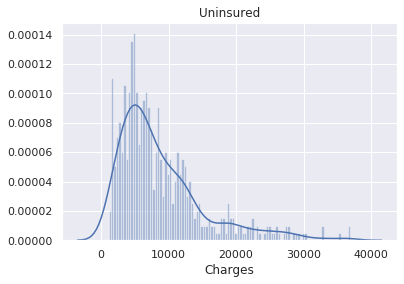

In [23]:
# plot a gaussian kernel density estimate over the histogram for uninsured
sns.set()
sns.distplot(pop_uninsured, bins=100, axlabel='Charges').set_title('Uninsured');

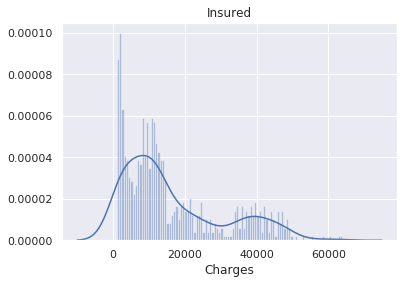

In [24]:
# plot a gaussian kernel density estimate over the histogram for insured
sns.set()
sns.distplot(pop_insured, bins=100, axlabel='Charges').set_title('Insured');

Perhaps the insured plot is bimodal.

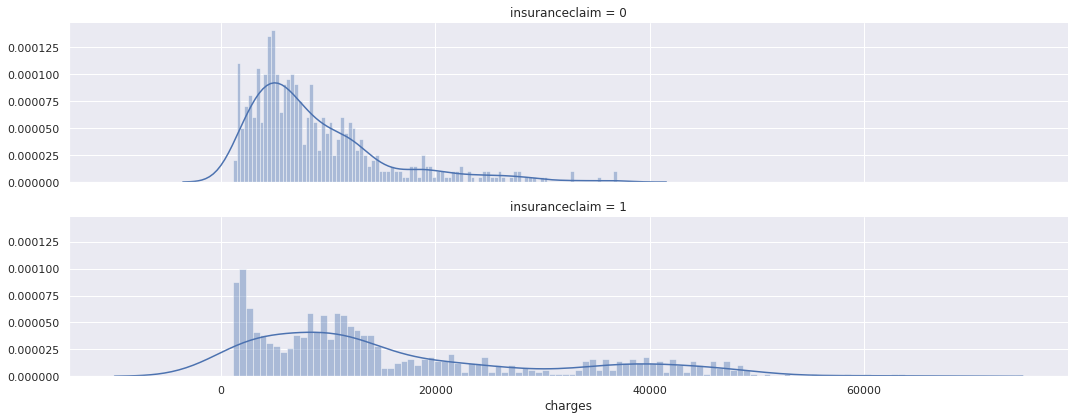

In [25]:
# stack plots to better observe differences of charges
g = sns.FacetGrid(medical, row='insuranceclaim', height=3, aspect=5,)
g.map(sns.distplot, 'charges', bins=100);

The insured patients account for most of the charges outliers.

Find the respective means of each population and their difference.

In [26]:
uninsured_mean = np.mean(pop_uninsured)
uninsured_mean

8821.421892306305

In [27]:
insured_mean = np.mean(pop_insured)
insured_mean

16423.928276537677

In [28]:
diff_means = uninsured_mean - insured_mean
diff_means

-7602.506384231372

It would appear that the insured people are indeed charged a different amount than the uninsured people.

Find the respective standard deviations of the mean of the two populations.

In [29]:
uninsured_std = np.std(pop_uninsured, ddof=1)
uninsured_std

6446.510126811738

In [30]:
insured_std = np.std(pop_insured, ddof=1)
insured_std

14045.928418802134

Find the respective degrees of freedom for each population.

In [31]:
df_uninsured = pop_uninsured.size - 1
df_uninsured

554

In [32]:
df_insured = pop_insured.size - 1
df_insured

782

In [33]:
# find the pooled degrees of freedom
pool_df = df_uninsured + df_insured
pool_df

1336

In [34]:
# find the pooled standard deviation
pool_std = np.sqrt(
    (df_uninsured * uninsured_std ** 2 + df_insured * insured_std ** 2) / pool_df)
pool_std

11520.034268775262

In [35]:
# calculate the t test statistic
t_stat = diff_means / (pool_std * np.sqrt(pop_uninsured.size ** -1 - pop_insured.size ** -1))
t_stat

-28.811307762679238

Find the p-value from the norm.pdf function using the calculated t test statistic and the pooled degrees of frredom.

In [36]:
p_value = stats.norm.pdf(t_stat, pool_std)
p_value

0.0

The p-value is zero. The null hypothesis should be rejected.

Another way to decide this is to compare the calculated t test statistic to the critical t value.

The concern pertains to the difference in average charges. Choose a 2-sided hypothesis test.

In [37]:
# calculating the alpha decimal value for a two-sided test
alpha95 = 100 - 95
alpha95_div2 = alpha95 / 2
alpha95_decimal = alpha95_div2 / 100
q95 = 1 - alpha95_decimal
q95

0.975

Find the critical t value from the t.ppf function using a 95% confidence level and the pooled degrees of freedom.

In [38]:
# find the critical t-value
t_critical = t.ppf(q95, pool_df)
t_critical

1.9617412190546957

The calculated t test statistic is farther from 0 than the t-critical value, so the null hypothesis is rejected.

In [39]:
# use the stats.ttest_ind function to verify
ttest_stat, p_val = stats.ttest_ind(pop_insured, pop_uninsured)
ttest_stat, p_val

(11.893299030876712, 4.461230231620717e-31)

The p-value here is zero, as well. So the null hypothesis should be rejected.<br>
This leaves the alternative hypothesis as accepted.<br>
Any observed difference between the means of the charges to each population is reliable.<br>
The insured people are charged a different amount than the uninsured people.

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do pass your data to it.

__Q:__ In the above calculations, we assumed the sample variances were equal. We may well suspect they are not (we'll explore this in another assignment). The calculation becomes a little more complicated to do by hand in this case, but we now know of a helpful function. Check the documentation for the function to tell it not to assume equal variances and perform the test again.

__A:__ Use the Welch's t-test, which does not assume equal population variance.<br>
To get this, set the equal_var parameter to False.

In [40]:
# retest and assume variances are not equal
t_welch, p_welch = stats.ttest_ind(pop_insured, pop_uninsured, equal_var=False)
t_welch, p_welch

(13.298031957975649, 1.1105103216309125e-37)

The p-value is still zero.

__Q:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ The stats.zscore function will give a z-score, but there isn't a function that performs a z-test.<br>
Statsmodels does have a stats.weightstats.ztest function that will do this, though.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test